In [62]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from random import randrange
from sklearn.metrics import precision_recall_curve
import math

In [2]:
G = nx.read_edgelist("airportData.edges")

In [3]:
print("#nodes: ",len(G.nodes()))
print("#edges: ",len(G.edges()))

#nodes:  3618
#edges:  14142


In [4]:
aaI = nx.adamic_adar_index(G, G.edges())
prefA = nx.preferential_attachment(G, G.edges())

In [35]:
i=0
for u, v, p in aaI:
    i+=1    
    #print((u,v,p))
print(i)

0


In [5]:
grafo = nx.complete_graph(5)
preds = nx.adamic_adar_index(grafo)
for u, v, p in preds:
    print((u,v,p))

### South America airports

In [7]:
GSouthA  = G.copy()
print("#nodes: ",len(GSouthA.nodes()))
print("#edges: ",len(GSouthA.edges()))

#nodes:  3618
#edges:  14142


In [8]:
southAmCts={'argentina':{}, 'bolivia':{}, 'brazil':{}, 'chile':{}, 'colombia':{}, 'ecuador':{}, 'guyana':{}, 'paraguay':{}, 'peru':{}, 'suriname':{}, 'uruguay':{}, 'venezuela':{}}
southAmAirp={}

In [9]:
f = open('airport_coor.txt')
for l in f:
    arreglo = l.split()
    if len(arreglo)>5 and arreglo[5].lower() in southAmCts:
        #print(arreglo)
        southAmAirp[arreglo[0]]={}
    elif   len(arreglo)==5 and arreglo[4].lower() in southAmCts:
        southAmAirp[arreglo[0]]={}
        #print(arreglo)

In [10]:
print("South American Airports: " + str(len(southAmAirp)))

South American Airports: 788


In [11]:
nodesRmSA=[]
for n in GSouthA:
    if n[:3] not in southAmAirp:
        nodesRmSA.append(n)

In [12]:
GSouthA.remove_nodes_from(nodesRmSA)

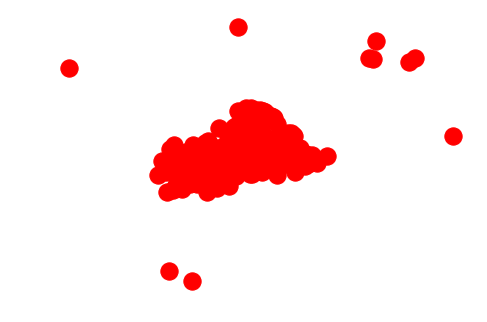

In [13]:
nx.draw(GSouthA)

In [14]:
print("#nodes: ",len(GSouthA.nodes()))
print("#edges: ",len(GSouthA.edges()))

#nodes:  279
#edges:  626


In [41]:
aaI = nx.adamic_adar_index(GSouthA)
prefA = nx.preferential_attachment(GSouthA)
j_c = nx.jaccard_coefficient(GSouthA)

In [42]:
#lista = list(prefA)
lista=[]

In [43]:
#print(lista)

In [44]:
i=0
for u, v, p in prefA:
    i+=1  
    lista.append(p)
    #print((u,v,p))
print(i)

38155


In [55]:
print(lista[:100])

[4, 28, 8, 8, 16, 8, 20, 16, 20, 28, 24, 4, 16, 4, 4, 8, 8, 8, 44, 8, 8, 20, 20, 16, 8, 8, 4, 72, 12, 20, 8, 24, 4, 0, 12, 16, 4, 12, 8, 8, 8, 16, 20, 8, 8, 60, 4, 8, 16, 8, 8, 8, 0, 8, 12, 8, 12, 16, 8, 16, 8, 4, 108, 16, 4, 56, 8, 8, 20, 4, 12, 8, 4, 20, 4, 0, 12, 28, 16, 80, 4, 112, 8, 16, 4, 40, 8, 20, 4, 20, 20, 20, 8, 12, 8, 8, 16, 32, 12, 12]


In [66]:
binarizer = preprocessing.Binarizer().fit([lista])
binarizer.transform([lista])

array([[1, 1, 1, ..., 1, 1, 1]])

In [65]:
print(binarizer)

Binarizer(copy=True, threshold=0.0)


In [21]:
GSouthATest  = GSouthA.copy()

In [22]:
edges = list(GSouthATest.edges())

In [23]:
#print(edges[:100])

### Spring Layout

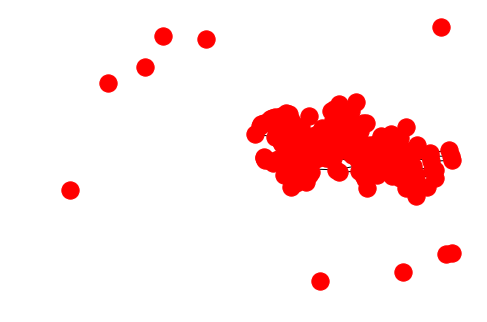

In [39]:
nx.draw(GSouthA,pos=nx.spring_layout(GSouthA, dim=2))

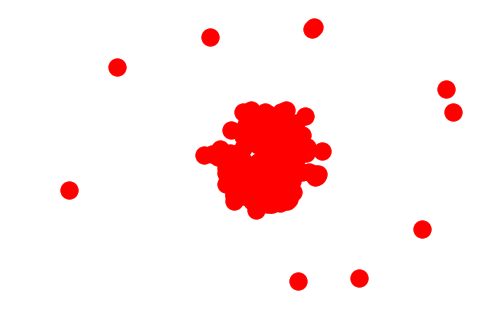

In [40]:
nx.draw(GSouthA)

In [34]:
print(pos)

{'AAA_Anaa': array([-0.39880724, -0.19290321,  0.86972172]), 'IPC_Easter_Island': array([-0.01883951, -0.05675088, -0.11202575]), 'BUE_Buenos_Aires': array([ 0.11467073, -0.03103193, -0.08843867]), 'SCL_Santiago_(CL)': array([ 0.01365787, -0.0153968 , -0.07264631]), 'SAO_Sao_Paulo': array([0.05805737, 0.016736  , 0.05993255]), 'SJU_San_Juan_(PR)': array([-0.12849551, -0.06123702, -0.03191806]), 'AFA_San_Rafael': array([ 0.18647979, -0.06507299, -0.09603165]), 'AOL_Paso_de_Los_Libres': array([ 0.14164863, -0.09913919, -0.0921219 ]), 'ASU_Asuncion': array([ 0.05343161,  0.00303907, -0.03554243]), 'BHI_Bahia_Blanca': array([ 0.12999015, -0.05518382, -0.14391222]), 'BOG_Bogota': array([-0.12547745,  0.00575397, -0.05060437]), 'BRC_San_Carlos_de_Bariloche': array([ 0.10138788, -0.04580006, -0.15636526]), 'CNQ_Corrientes': array([ 0.17037347, -0.08221946, -0.10924206]), 'COC_Concordia': array([ 0.19567748, -0.03609615, -0.09999199]), 'COR_Cordoba': array([ 0.09973229, -0.00187824, -0.0658802

In [106]:
for (u,v) in edges:
    if randrange(10)==0:
        GSouthATest.remove_edge(u, v)
    #print(randrange(10))

In [139]:
print("#nodes: ",len(GSouthATest.nodes()))
print("#edges: ",len(GSouthATest.edges()))

#nodes:  279
#edges:  567


In [46]:
aa_index = nx.adamic_adar_index(GSouthATest)
pref_attc = nx.preferential_attachment(GSouthATest)

In [47]:
lista_t=[]

In [48]:
i=0
for u, v, p in pref_attc:
    i+=1  
    lista_t.append(p)
    #print((u,v,p))
print(i)

38155


In [56]:
print(lista_t[:100])

[4, 28, 8, 8, 16, 8, 20, 16, 20, 28, 24, 4, 16, 4, 4, 8, 8, 8, 44, 8, 8, 20, 20, 16, 8, 8, 4, 72, 12, 20, 8, 24, 4, 0, 12, 16, 4, 12, 8, 8, 8, 16, 20, 8, 8, 60, 4, 8, 16, 8, 8, 8, 0, 8, 12, 8, 12, 16, 8, 16, 8, 4, 108, 16, 4, 56, 8, 8, 20, 4, 12, 8, 4, 20, 4, 0, 12, 28, 16, 80, 4, 112, 8, 16, 4, 40, 8, 20, 4, 20, 20, 20, 8, 12, 8, 8, 16, 32, 12, 12]


In [51]:

y = np.array(lista)
pred = np.array(lista_t)
#fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
#print(metrics.auc(fpr, tpr))


In [57]:
precision, recall, _ = precision_recall_curve(pred, y)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

ValueError: multiclass format is not supported

In [59]:
import numpy as np
from sklearn.metrics import roc_auc_score

roc_auc_score(pred, y)

ValueError: multiclass format is not supported